In [24]:
# Mengimport data yang diperlukan
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/transaksi_retail_dqlab_v2.tsv",sep="\t")
print(data.head())

      Tanggal Kode Produk            Nama Produk  Jumlah  Harga
0  10-04-2020     Item-11      Sabun Cuci Piring       3  14000
1  10-04-2020     Item-11      Sabun Cuci Piring       3  14000
2  10-04-2020     Item-11      Sabun Cuci Piring       2  14000
3  10-04-2020     Item-02  Bawang Putih 200 gram       3  15000
4  10-04-2020     Item-03  Gula Pasir Putih 1 kg       2  12500


In [20]:
# Menghitung total produk berdasarkan nama produk
print(data["Jumlah"].groupby(data["Nama Produk"]).sum())

Nama Produk
Balsem Putih 20 gram        13
Batere AA                  184
Bawang Putih 200 gram      402
Beras Pulen 5 kg            27
Biskuit Waver Kaleng       135
Gula Pasir Putih 1 kg      547
Ketan Hitam 500 gram        23
Kopi Instant               384
Mi Goreng Instant          642
Obat Batuk                  73
Obat Diare                   4
Pisau Cukur                 31
Roti Tawar                 172
Sabun Cuci Piring          108
Sabun Mandi Cair 100 ml    394
Sabut Cuci Piring           36
Teh Celup Melati            58
Telur Ayam Negeri           29
Vitamin C                  146
Name: Jumlah, dtype: int64


In [23]:
# Mengganti format tanggal menjadi bulanan kemudian menghitung jumlah produk berdasarkan nama produk dan bulan
import datetime
data["Bulan"] = data["Tanggal"].apply(lambda x : datetime.datetime.strptime(x,"%d-%m-%Y").strftime("%m-%Y"))
print(data.groupby(["Bulan","Nama Produk"])["Jumlah"].sum())

Bulan    Nama Produk            
04-2020  Balsem Putih 20 gram        13
         Batere AA                   79
         Bawang Putih 200 gram      169
         Beras Pulen 5 kg            27
         Biskuit Waver Kaleng        92
         Gula Pasir Putih 1 kg      272
         Ketan Hitam 500 gram        23
         Kopi Instant               123
         Mi Goreng Instant          247
         Obat Batuk                  73
         Obat Diare                   4
         Pisau Cukur                 31
         Roti Tawar                  96
         Sabun Cuci Piring           96
         Sabun Mandi Cair 100 ml    195
         Sabut Cuci Piring           28
         Teh Celup Melati            58
         Telur Ayam Negeri           29
         Vitamin C                   98
05-2020  Batere AA                   93
         Bawang Putih 200 gram      220
         Biskuit Waver Kaleng        43
         Gula Pasir Putih 1 kg      246
         Kopi Instant               217
       

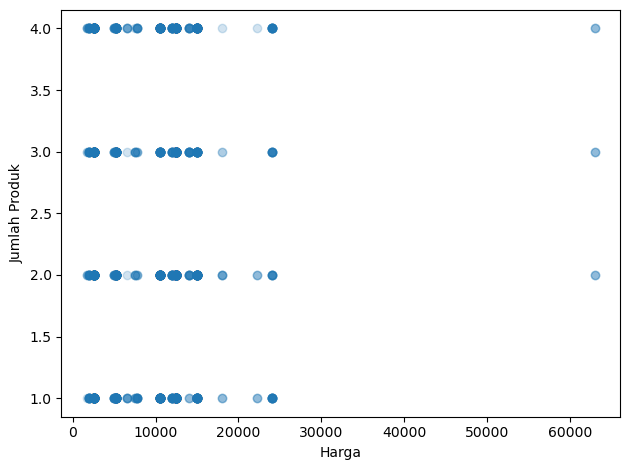

In [30]:
# Visualisasi Data : Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(data["Harga"],data["Jumlah"],alpha=0.2)
plt.xlabel("Harga")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

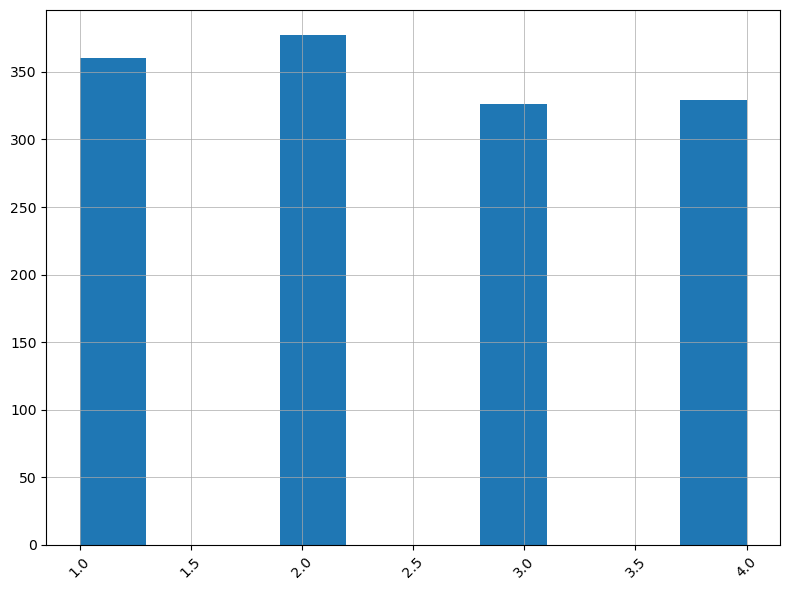

In [33]:
# Visualisasi Data : Histogram
plt.figure(figsize=(8,6))
plt.hist(data["Jumlah"])
plt.grid(color="darkgrey",linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

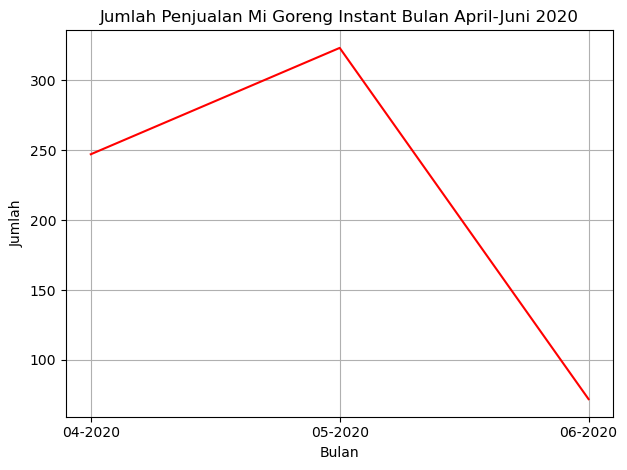

In [39]:
# Visualisasi Data : Line Chart (Memvisualisasikan produk Mi goreng instant)
df = data[data["Nama Produk"] == "Mi Goreng Instant"]
x = df["Bulan"].unique()
df = df.groupby(["Bulan","Nama Produk"])["Jumlah"].sum()
plt.plot(x,df,color="red")
plt.grid()
plt.title("Jumlah Penjualan Mi Goreng Instant Bulan April-Juni 2020")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

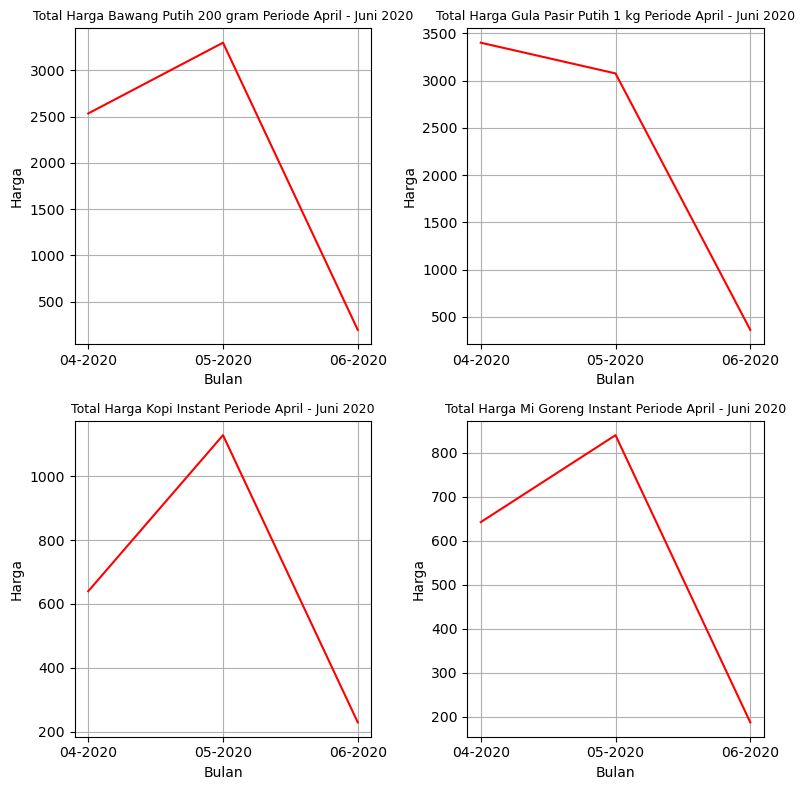

In [77]:
# Mini Project : Menyajikan total harga Bawang Putih, Gula Pasir, Kopi Instant, dan Mi Goreng Instant per bulannya
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/transaksi_retail_dqlab_v2.tsv",sep="\t")
data["Bulan"] = data["Tanggal"].apply(lambda x : dt.datetime.strptime(x,"%d-%m-%Y").strftime("%m-%Y"))
data["Total"] = data["Harga"] * data["Jumlah"] / 1000
produk = ["Bawang Putih 200 gram","Gula Pasir Putih 1 kg","Kopi Instant","Mi Goreng Instant"]
bulan = list(data["Bulan"].unique())
threshold = False
baris = 0
kolom = 0
fig, ax = plt.subplots(2,2,figsize=(8,8))
for nama in produk :
    data_visualisasi = data[data["Nama Produk"]==nama]
    data_visualisasi = data_visualisasi.groupby(["Bulan","Nama Produk"])["Total"].sum()
    ax[baris][kolom].plot(bulan,data_visualisasi,color="red")
    ax[baris][kolom].grid()
    ax[baris][kolom].set_xlabel("Bulan")
    ax[baris][kolom].set_ylabel("Harga")
    ax[baris][kolom].set_title("Total Harga {} Periode April - Juni 2020".format(nama),fontsize=9)
    if threshold == False :
        kolom += 1
        threshold = True
    else :
        baris += 1
        kolom = 0
        threshold=False
plt.tight_layout()

Sumber Belajar = www.dqlab.id